<a href="https://colab.research.google.com/github/Hemantr05/recommendation_systems/blob/main/song_recommendation%20/recommendation_with_nmf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Predicting songs genre with clustering



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#scaling methods
from sklearn.preprocessing import StandardScaler

#clustering algorithms
from sklearn.cluster import KMeans
from collections import Counter


#pandas font
# font = {'family' : 'comic-sans',
        # 'weight' : 'normal',
        # 'size'   : 15}

# plt.rc('font', **font)


In [ ]:
db = pd.read_csv('spotify_songs_dataset/genres_v2.csv')
db.head()

<ipython-input-76-2106ccddac3f>:1: DtypeWarning:

Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.



,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


## Data Exploration

In [ ]:
db.shape

(42305, 22)

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [ ]:
# Exploring content in 'Unnamed: 0' column
db['Unnamed: 0'].unique()

array([       nan, 0.0000e+00, 1.0000e+00, ..., 2.0997e+04, 2.0998e+04,
       2.0999e+04])

In [ ]:
# How
empty_song_name = db.loc[db['song_name'].isna()]['Unnamed: 0'].isna().sum()
empty_song_name

6

In [ ]:
# Merging all songs_names and playlist

db['song_name'] = db['song_name'].fillna(db['title'])
db['song_name'] = db['song_name'].fillna(db['Unnamed: 0'])
db = db.drop(['Unnamed: 0','title'],axis= 1)
db = db.dropna()

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42299 entries, 0 to 42304
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42299 non-null  float64
 1   energy            42299 non-null  float64
 2   key               42299 non-null  int64  
 3   loudness          42299 non-null  float64
 4   mode              42299 non-null  int64  
 5   speechiness       42299 non-null  float64
 6   acousticness      42299 non-null  float64
 7   instrumentalness  42299 non-null  float64
 8   liveness          42299 non-null  float64
 9   valence           42299 non-null  float64
 10  tempo             42299 non-null  float64
 11  type              42299 non-null  object 
 12  id                42299 non-null  object 
 13  uri               42299 non-null  object 
 14  track_href        42299 non-null  object 
 15  analysis_url      42299 non-null  object 
 16  duration_ms       42299 non-null  int64 

In [ ]:
print(f"Number of genres in given dataset: {len(db['genre'].unique())}")

Number of genres in given dataset: 15


In [ ]:
# Dropping unwanted/useless feature (it will be help with clustering)
db = db.drop(['track_href', 'analysis_url', 'uri', 'id', 'type'],axis =1)

In [ ]:
db.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4,Dark Trap,Venom


<ipython-input-86-ad50dab75d4d>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



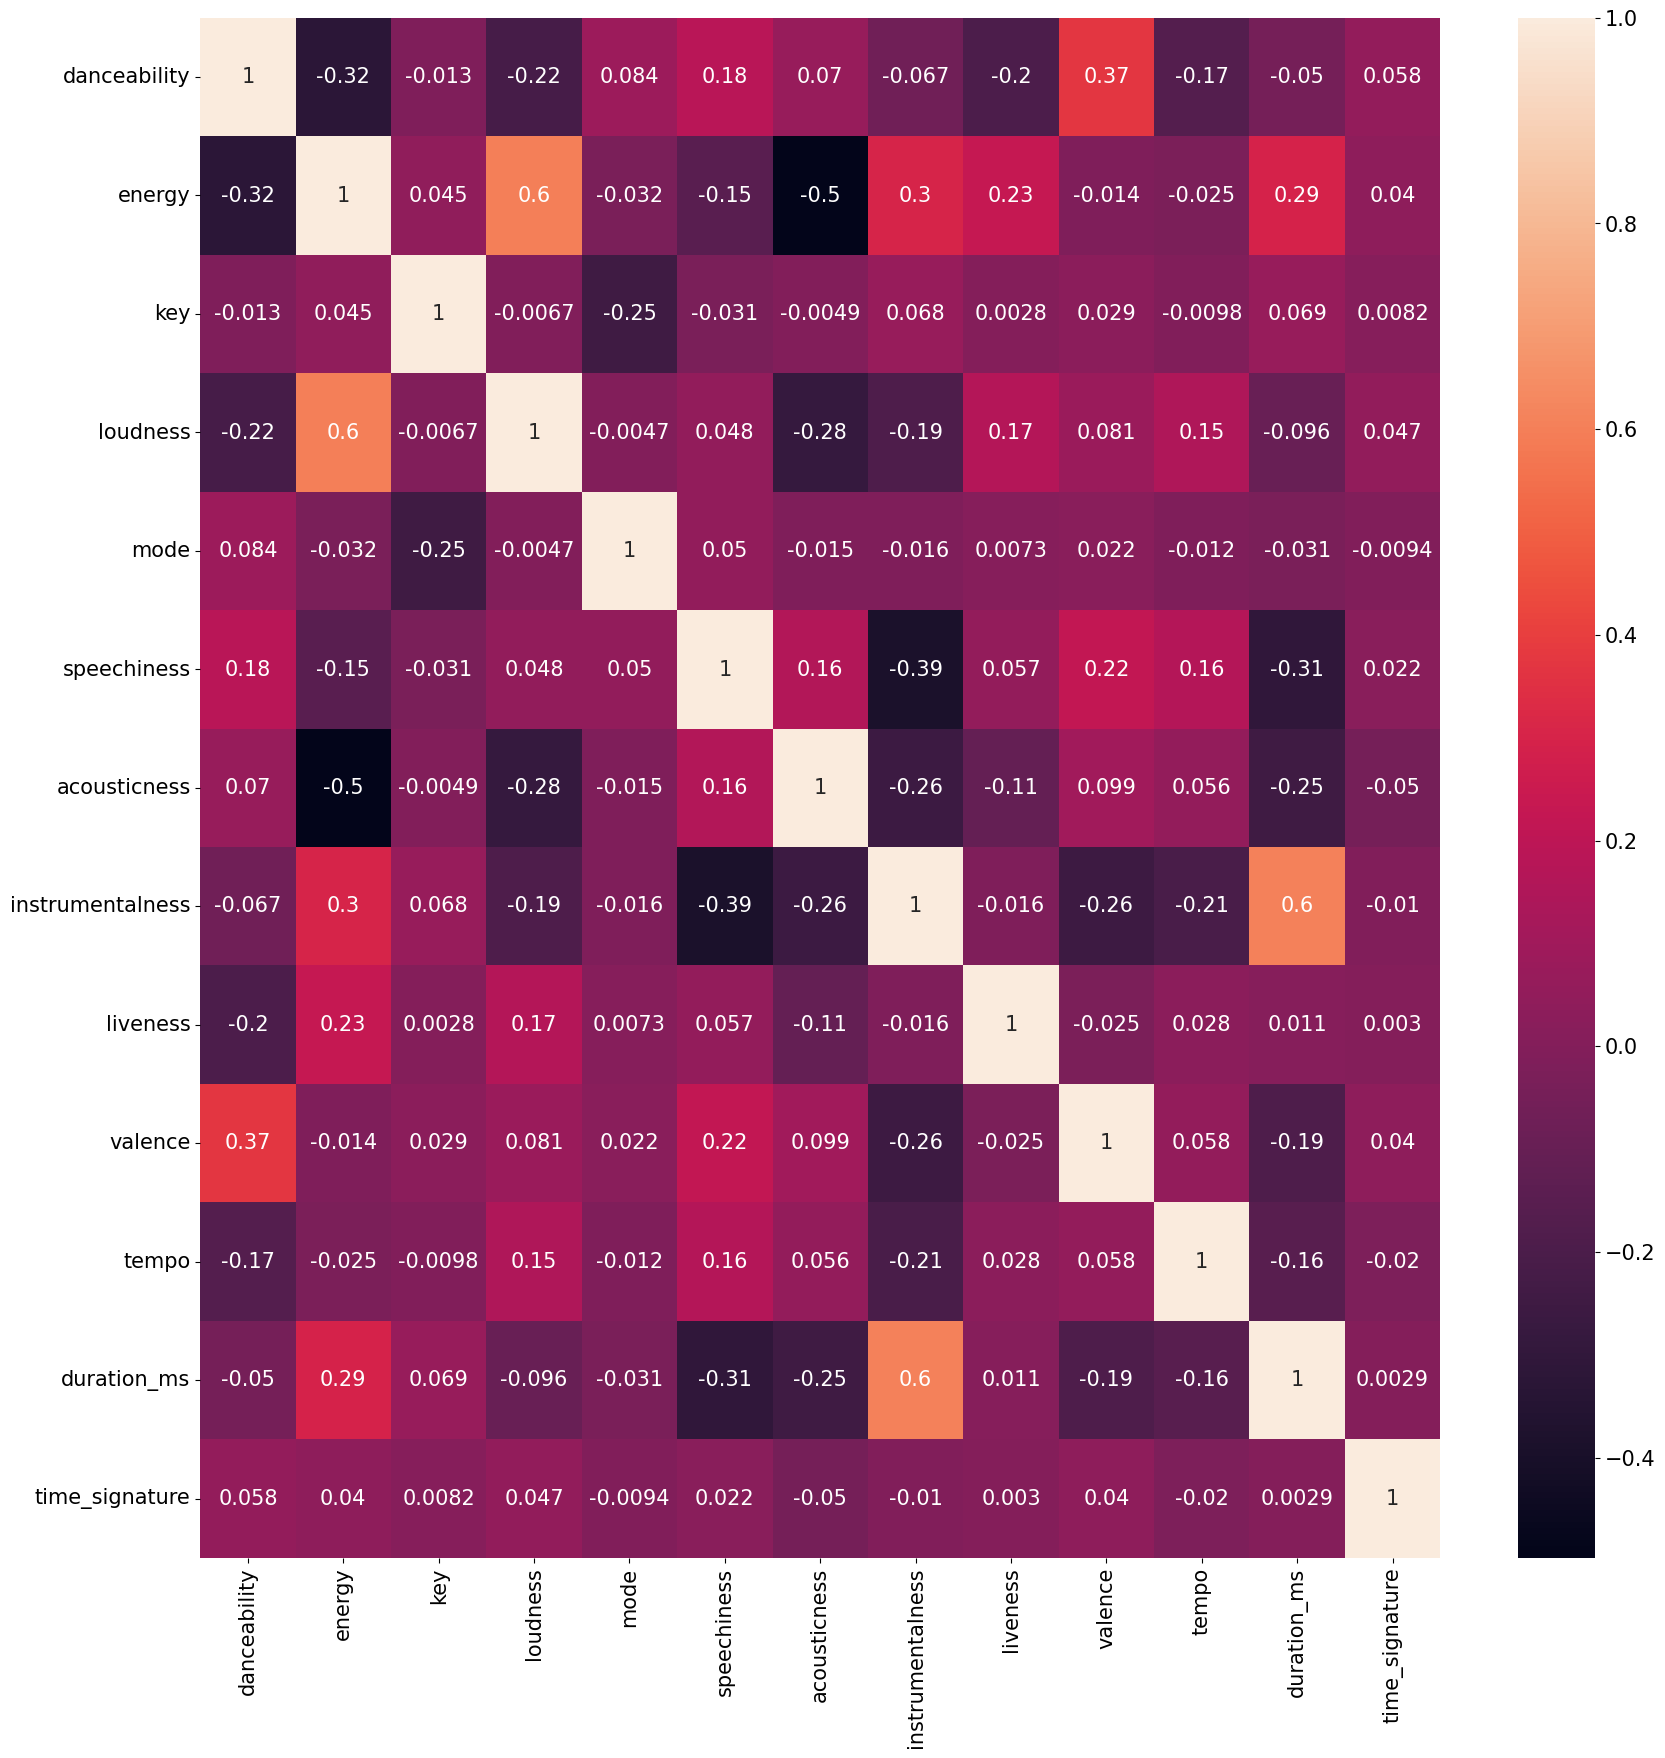

In [ ]:
plt.figure(figsize = (20,20))
corr = db.corr()
dataplot = sns.heatmap(corr, annot=True)
plt.show()

Insights from the matrix

- Duration of song maybe causing the dataset to skew

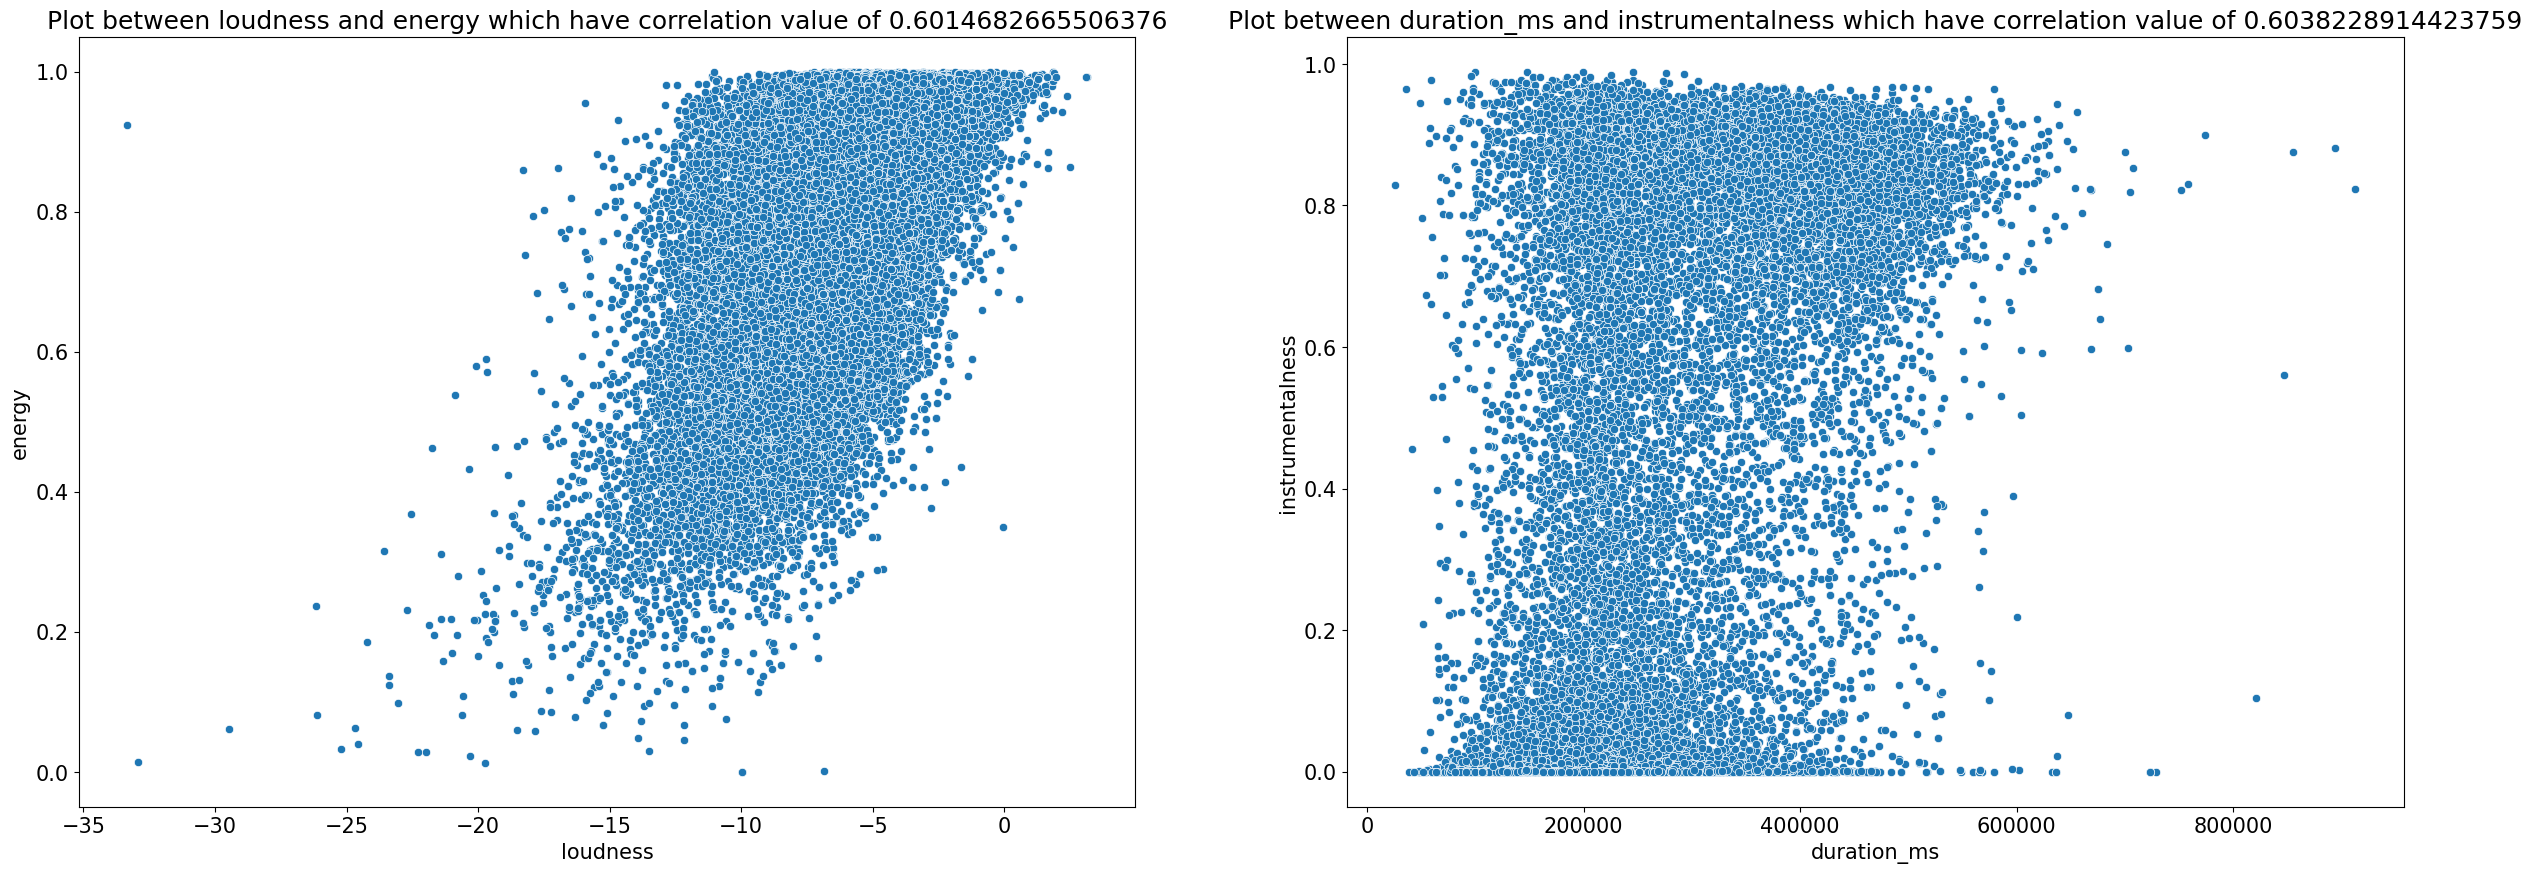

In [ ]:
plt.figure(figsize = (30,10))

# plot between parameters with max correlation rating
plt.subplot(121)
sns.scatterplot(x = db['loudness'],y= db['energy'])
plt.title(f"Plot between loudness and energy which have correlation value of {corr['loudness']['energy']}")

# plot between parameters with min correlation rating
plt.subplot(122)
sns.scatterplot(x = db['duration_ms'],y= db['instrumentalness'])
plt.title(f"Plot between duration_ms and instrumentalness which have correlation value of {corr['duration_ms']['instrumentalness']}")

plt.show()

In [ ]:
db.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000
mean,0.639358,0.762544,5.369843,-6.464941,0.549446,0.136549,0.096161,0.283069,0.214091,0.357090,147.473466,250876.150760,3.972600
std,0.156622,0.183813,3.666167,2.940971,0.497555,0.126158,0.170836,0.370796,0.175585,0.233195,23.843268,102959.543798,0.268319
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000
25%,0.524000,0.632000,1.000000,-8.160000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179853.000000,4.000000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005950,0.135000,0.322000,144.973000,224770.000000,4.000000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.453000,301133.000000,4.000000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000


In [ ]:
db.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'genre', 'song_name'],
      dtype='object')

In [ ]:
numeric_columns = db.select_dtypes(include=np.number).columns.tolist()

## Data Preprocessing

In [ ]:
# Normalizing values to fit between -1 and 1, to remove skew
scaler = StandardScaler()
db[numeric_columns] = scaler.fit_transform(db[numeric_columns])

**Note 1:** We perform scaling across all columns as if we only scaled the skewed value columns the data will be distributed unevenly. Which would not be fruitful to use.

**Note 2:** If the values of the unskewed columns were already scaled, we would just use log_transform on the skew valued columns

## Feature selection

In [ ]:
# Dropping categorical columns
cluster_data = db.drop(['genre','song_name'], axis=1)

## Clustering

In [ ]:
# No. of clusters

n_clusters = db['genre'].nunique()
n_clusters

15

In [ ]:
kmeans = KMeans(n_clusters, random_state=42,max_iter=300)
kmeans.fit(cluster_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=15, random_state=42)

## Data Postprocessing

In [ ]:
# Replacing Genres to categories to compare with clustering results
db['clusters'] = kmeans.labels_
db.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre,song_name,clusters
0,1.223614,0.279938,-0.919184,-0.305705,0.905548,2.246819,-0.212844,-0.727278,-0.902652,0.136840,0.398924,-1.227071,0.102119,Dark Trap,Mercury: Retrograde,2
1,0.508507,-1.466426,0.717422,-0.260141,0.905548,-0.452997,1.784414,-0.763417,-0.547265,-0.999562,-1.358616,-0.256892,0.102119,Dark Trap,Pathology,12
2,1.344927,0.709728,-0.100881,0.571907,0.905548,-0.588543,-0.482111,-0.763406,0.899343,-1.363640,2.960054,-1.476861,0.102119,Dark Trap,Symbiote,6
3,-1.043020,0.100405,-1.464720,0.596729,0.905548,-0.265928,-0.424160,-0.763417,-0.570046,-0.780858,1.655604,-1.235598,-3.624835,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),5
4,1.012913,-0.753735,-0.919184,-0.409073,0.905548,1.240135,0.707347,-0.763417,-0.273890,1.003079,0.021580,-1.239124,0.102119,Dark Trap,Venom,2


In [ ]:
cluster_count = db['clusters'].value_counts().reset_index()
cluster_count.columns = ['cluster', 'cluster_count']
cluster_count.sort_values('cluster_count')


,cluster,cluster_count
14,14,150
13,5,1089
12,9,2189
11,8,2276
10,0,2305
9,4,2356
8,11,2384
7,2,2779
6,13,2988
5,10,3637


In [ ]:
genre_count = db['genre'].value_counts().reset_index()
genre_count.columns = ['genre', 'genre_count']
genre_count.sort_values('genre_count')

,genre,genre_count
14,Pop,461
13,Emo,1680
12,Rap,1848
11,Trap Metal,1956
10,RnB,2099
9,hardstyle,2936
8,techno,2956
7,psytrance,2961
6,dnb,2966
5,techhouse,2975


# 2. Songs recommendation system

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns


In [ ]:
spoti = pd.read_csv("spotify_songs_dataset/genres_v2.csv")
spoti.head(3)

<ipython-input-104-37ea980ca035>:1: DtypeWarning:

Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.



,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN


In [ ]:
spoti.shape

(42305, 22)

In [ ]:
song_name = spoti["song_name"]

In [ ]:
print(song_name.shape)
print(song_name.isnull().values.any())
print(song_name.isna().sum())


(42305,)
True
20786


In [ ]:
song_name = song_name.values.reshape(-1,1)

In [ ]:
song_name.shape

(42305, 1)

In [ ]:
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imr = imr.fit(song_name)
imputed_data = imr.transform(song_name)
song_name = pd.DataFrame(imputed_data)
song_name = song_name.rename(columns={0:"Song-Names"})
song_name.head(3)

,Song-Names
0,Mercury: Retrograde
1,Pathology
2,Symbiote


In [ ]:
core = spoti[["genre","mode","duration_ms"]]
print(core.dtypes)
print(core.head())

genre          object
mode            int64
duration_ms     int64
dtype: object
       genre  mode  duration_ms
0  Dark Trap     1       124539
1  Dark Trap     1       224427
2  Dark Trap     1        98821
3  Dark Trap     1       123661
4  Dark Trap     1       123298


In [ ]:
core.dtypes

genre          object
mode            int64
duration_ms     int64
dtype: object

In [ ]:
core["genre"].value_counts()

Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: genre, dtype: int64

In [ ]:
# Mapping genres to numeric values
core = core.replace(
    {
        "genre":
            {
                "Underground Rap":0,
                "Dark Trap":1,
                "Hiphop":2,
                "trance":3,
                "trap":4,
                "techhouse":5,
                "dnb":6,
                "psytrance": 7,
                "techno":8,
                "hardstyle":9,
                "RnB":10,
                "Trap Metal":11,
                "Rap":12,
                "Emo":13,
                "Pop":14
              }
      })

**APPLYING NMF**

Non-negative matrix factorization (NMF), also non-negative matrix approximation is a group of algorithms in multivariate analysis and linear algebra where a matrix V is factorized into (usually) two matrices W and H, with the property that all three matrices have no negative elements. This non-negativity makes the resulting matrices easier to inspect.



In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(n_components = 6)
nmf_features = nmf.fit_transform(core)

**PREPROCESSING**

normalize() samples individually to unit norm. Each sample (i.e. each row of the data matrix) with at least one non zero component is rescaled independently of other samples so that its norm (l1, l2 or inf) equals one. This transformer is able to work both with dense numpy arrays and scipy.

In [ ]:
from sklearn.preprocessing import normalize
norm_features = normalize(nmf_features)
current_music = norm_features[23,:]
similarities = norm_features.dot(current_music)
similarities

array([0.98931043, 0.996053  , 0.92556566, ..., 0.99403524, 0.99744745,
       0.99338394])

## Postprocessing

In [ ]:
df = pd.DataFrame(norm_features)

In [ ]:
x = df.join(song_name)

In [ ]:
df = pd.pivot_table(x, x[[0,1,2,3,4,5]],["Song-Names"]) # for indexing song_name to our df

In [ ]:
df

,0,1,2,3,4,5
Song-Names,,,,,,
"""Enough.""",0.124088,0.000001,0.000000e+00,1.537968e-02,0.992126,7.244683e-03
"""Life""",0.186347,0.000016,3.862477e-08,1.610487e-01,0.945874,1.905398e-12
"""Quarter Century Freestyle""",0.181812,0.000000,0.000000e+00,2.323904e-01,0.955479,0.000000e+00
"""The Take Over, The Breaks Over""",0.273744,0.000306,0.000000e+00,6.578629e-02,0.957771,4.517719e-10
"""You said you love me...""",0.096735,0.000000,0.000000e+00,1.241527e-02,0.995221,4.732442e-03
...,...,...,...,...,...,...
• Tales,0.363099,0.000000,3.379686e-08,2.629349e-02,0.931379,0.000000e+00
ムスティネ,0.056448,0.000030,3.369444e-08,3.034415e-01,0.951177,3.895616e-12
泳 (Yong),0.338303,0.000000,2.674517e-08,2.349785e-02,0.940744,0.000000e+00


In [ ]:
def current_music(value):
    print("Top 5 recommendations for given music are:")
    value = df.loc[value]
    similarities = df.dot(value)
    print(format(similarities.nlargest()))

In [ ]:
current_music("Missed Calls - Remix")

Top 5 recommendations for given music are:
Song-Names
Missed Calls - Remix                                           1.000000
In My Bed (DJ Tay James & Harv Unofficial Remix) [Dru Hill]    1.000000
Figg Get Da Money                                              0.999991
The Suffering                                                  0.999991
Thuggin’                                                       0.999990
dtype: float64


In [ ]:
current_music('"Enough."')

Top 5 recommendations for given music are:
Song-Names
"Enough."                       1.000000
Bullseye                        0.999975
HOMICIDE                        0.999967
forget me too (feat. Halsey)    0.999956
A Calabasas Freestyle           0.999949
dtype: float64
